In [5]:
import os.path

import skimage.io

import joblib
import warnings

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
data_set_dir = "/home/jr0th/github/segmentation/data/set03/"

# derived directories
in_dir_images_training = data_set_dir + "training/x_big/all/"
in_dir_labels_training = data_set_dir + "training/y_big/all/"

in_dir_images_validation = data_set_dir + "validation/x_big/all/"
in_dir_labels_validation = data_set_dir + "validation/y_big/all/"

in_dir_images_test = data_set_dir + "test/x_big/all/"
in_dir_labels_test = data_set_dir + "test/y_big/all/"

out_dir_images_training = data_set_dir + "training/x/all/"
out_dir_labels_training = data_set_dir + "training/y/all/"

out_dir_images_validation = data_set_dir + "validation/x/all/"
out_dir_labels_validation = data_set_dir + "validation/y/all/"

out_dir_images_test = data_set_dir + "test/x/all/"
out_dir_labels_test = data_set_dir + "test/y/all/"

in_dirs_images = [in_dir_images_training, in_dir_images_validation, in_dir_images_test]
in_dirs_labels = [in_dir_labels_training, in_dir_labels_validation, in_dir_labels_test]

out_dirs_images = [out_dir_images_training, out_dir_images_validation, out_dir_images_test]
out_dirs_labels = [out_dir_labels_training, out_dir_labels_validation, out_dir_labels_test]

In [20]:
def process_image(index, images, out_dir_image):
    
    image = images[index]

    path = images.files[index]
    filename = os.path.basename(path)
    
    split = os.path.splitext(filename)

    blocks = skimage.util.view_as_windows(image, (256, 256), 256)
    
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            patchname = split[0] + '_' + str(i) + '_' + str(j) + split[1]
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                skimage.io.imsave(out_dir_image + patchname, blocks[i,j])
                
def process_label(index, labels, out_dir_label):
    
    label = labels[index]

    path = labels.files[index]
    filename = os.path.basename(path)
    
    split = os.path.splitext(filename)

    blocks = skimage.util.view_as_windows(label, (256, 256, 3), 256)
    blocks = blocks.squeeze()
    
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            patchname = split[0] + '_' + str(i) + '_' + str(j) + split[1]
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                skimage.io.imsave(out_dir_label + patchname, blocks[i,j])

def process_image_dir(in_dir_image, out_dir_image):
    images = skimage.io.imread_collection(in_dir_image + '*.png')
    joblib.Parallel(n_jobs = 100)(joblib.delayed(process_image)(i, images, out_dir_image) for i in range(len(images)))  
    
def process_label_dir(in_dir_label, out_dir_label):
    labels = skimage.io.imread_collection(in_dir_label + '*.png')
    joblib.Parallel(n_jobs = 100)(joblib.delayed(process_label)(i, labels, out_dir_label) for i in range(len(labels)))  

In [ ]:
for i in range(len(in_dirs_images)):
    process_image_dir(in_dirs_images[i], out_dirs_images[i])

In [ ]:
for i in range(len(in_dirs_labels)):
    print(str(i))
    process_label_dir(in_dirs_labels[i], out_dirs_labels[i])

0
1


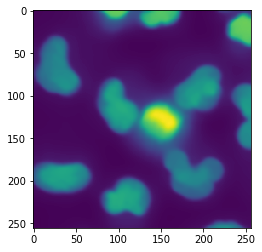

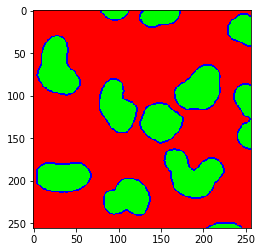

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

img_y = skimage.io.imread('/home/jr0th/github/segmentation/data/set03/test/y/all/r01c01f01p01-ch1sk1fk1fl1_0_0.png')
img_x = skimage.io.imread('/home/jr0th/github/segmentation/data/set03/test/x/all/r01c01f01p01-ch1sk1fk1fl1_0_0.png')

plt.figure()
plt.imshow(img_x)
plt.show()
plt.figure()
plt.imshow(img_y)
plt.show()
                        